In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

import clean_reviews as clean

In [8]:
df = pd.read_csv('./amz_tshirt_reviews.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40521 entries, 0 to 40520
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  40521 non-null  object 
 1   attr          0 non-null      float64
 2   scores        40441 non-null  object 
 3   review_title  40441 non-null  object 
 4   reviews       40521 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


In [10]:
# using dictionary to convert specific columns
convert_dict = {'product_name': str,
                'attr': str,
				'review_title' : str,
                'reviews' : str
               }
df = df.astype(convert_dict)

#### when I webscrapped the data, I had a bug that caused the 'attr' column to be null, I need to re-run the webscrapping ipynb file and get the complete dataset 

In [11]:
df.shape

(40521, 5)

In [12]:
df.sample(10)

,product_name,attr,scores,review_title,reviews
36498,Amazon Essentials Men's 2-Pack Slim-fit Short-...,nan,5.0 out of 5 stars,\nNice T\n,"<span class=""a-size-base review-text review-te..."
10430,Russell Athletic Men's Cotton Performance Shor...,nan,5.0 out of 5 stars,\nOoooops\n,"<span class=""a-size-base review-text review-te..."
11705,Under Armour Men's Sportstyle Left Chest Short...,nan,2.0 out of 5 stars,\nMuch larger than they used to be\n,"<span class=""a-size-base review-text review-te..."
17764,Amazon Essentials Women's 2-Pack Classic-Fit S...,nan,4.0 out of 5 stars,\nTrust Your Size Not Amazon\n,"<span class=""a-size-base review-text review-te..."
360,"Gildan Men's Ultra Cotton T-Shirt, Style G2000...",nan,5.0 out of 5 stars,\nGreat fit\n,"<span class=""a-size-base review-text review-te..."
21057,Hanes Women's Shirred V-Neck T-Shirt,nan,5.0 out of 5 stars,\nGood quality for the price!\n,"<span class=""a-size-base review-text review-te..."
20918,5 Pack: Men’s Dry-Fit Moisture Wicking Active ...,nan,4.0 out of 5 stars,\nGreat dri fit style of shirt\n,"<span class=""a-size-base review-text review-te..."
23771,"Champion Men's Classic T-Shirt, Screen Print S...",nan,1.0 out of 5 stars,\nShirt shrank!\n,"<span class=""a-size-base review-text review-te..."
29763,Hanes Men's Short Sleeve Beefy-T (Pack of 2),nan,5.0 out of 5 stars,\nPurchased for a sleep shirt\n,"<span class=""a-size-base review-text review-te..."
6034,"Gildan Men's V-Neck T-Shirts, Multipack",nan,4.0 out of 5 stars,\nYou get what you pay for\n,"<span class=""a-size-base review-text review-te..."


In [29]:
duplicate = df[df.duplicated()]
duplicate.shape


(20501, 6)

## Extract review score as int

In [13]:
df.scores.fillna('9')
df.scores = df.scores.str.slice(start = 0, stop =1)

# How many products does this dataset have? 

In [14]:
df.product_name.nunique()

46

# What is the distribution of scores 

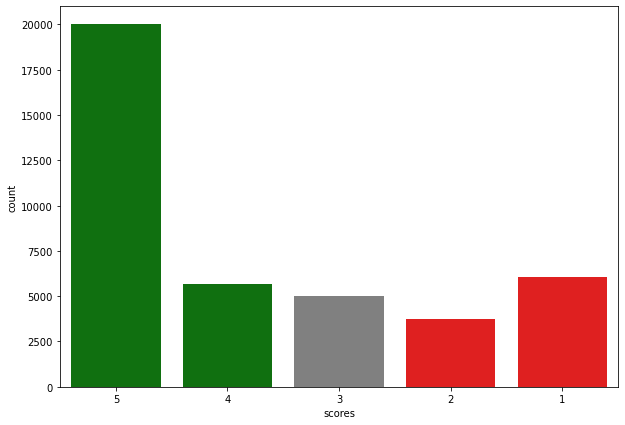

In [15]:
clrs = ['green', 'green', 'grey', 'red', 'red']
sns.countplot( data = df, x = 'scores', order = ['5', '4', '3', '2', '1'], palette=clrs)
# sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)
plt.gcf().set_size_inches(10, 7)



## most of the reviews are 4 and 5 stars.
#### Since we only have few for 1 and 2 stars, I will consider 3 as a bad review. I will create a new boolean column called 'like' which answers the question: 'did the customer like the product or not?'
- 'yes': for 4 & 5 stars ratings
- 'no' :  for 3, 2, and 1 stars 

In [16]:

df.scores.isnull().sum()

80

In [17]:
df.loc[df['scores'].isnull()] = -1
df.scores = df.scores.astype(int)
def like(x):
    if x < 0:
        return None
    else:
        return x > 3

df['like'] = df.scores.apply(like)
df['like'] = df['like'].astype(bool)

<AxesSubplot:xlabel='like', ylabel='count'>

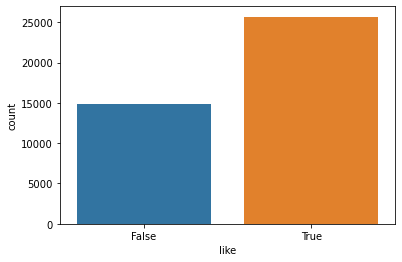

In [18]:
sns.countplot(data=df, x = 'like')

In [19]:
df.like.value_counts()

True     25680
False    14841
Name: like, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40521 entries, 0 to 40520
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  40521 non-null  object
 1   attr          40521 non-null  object
 2   scores        40521 non-null  int64 
 3   review_title  40521 non-null  object
 4   reviews       40521 non-null  object
 5   like          40521 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.6+ MB


In [21]:
#increase the column width to be able to view long reviews 
pd.set_option('max_colwidth', 500)
df['reviews'].sample(2)

20215    <span class="a-size-base review-text review-text-content" data-hook="review-body">\n<span>\n  over the holiday, I ordered medium, Large and xtra large the shirts tend to run smaller then the size it comes in.<br/>BUT, Each time I had to return and reorder there was no problem sending it back or getting a new order. I am very happy with the shirts and will continue to purchase from this company. Once the right size came everyone was very happy. Thank you for making my shopping easy. Madeline ...
29851                                                  <span class="a-size-base review-text review-text-content" data-hook="review-body">\n<span>\n  6'4"/185#/43 inch chest/32 inch waist - size L is almost too tight from chest down.  Fit and fabric weight make this shirt hot in warm weather. Definitely long enough for any height - if you're not tall you might not like the length.  Maybe an XL for torso fit but the length will still be a factor. Quality is good even if fit is a bit off.\

In [22]:
test = ["shirts", "this t shirts", "this tee shirts", "tshirts"]
print(clean.clean(test))

shirts this shirts this shirts tshirts


In [25]:
df.iloc[22575:]

,product_name,attr,scores,review_title,reviews,like
22575,"Gildan Men's DryBlend Workwear T-Shirts with Pocket, 2-Pack",nan,5,comfortable,i have purchased many shirts in my past but most were lightweight especially at these prices i expected the same with these but i was dramatically shocked these are the greatest shirts i have purchased at these prices these shirts are the highest quality shirts and they each weigh three times what my ither shirts ever weighed i only wear shirts for they are so much more comfortable and being retired and i do not live to impress anyone,True
22576,"Gildan Men's DryBlend Workwear T-Shirts with Pocket, 2-Pack",nan,5,being pregnant i love these shirts,i bought these shirts primarily for work i work in a kitchen and the cook shirts do not stretch i bought extra large because of my extended belly and they fit perfectly roomy enough to be comfortable but not overly large they are pretty comfortable soft and do not chafe after a full day working in a kitchen only had them a few days but they are holding up will update after a few months of wear,True
22577,"Gildan Men's DryBlend Workwear T-Shirts with Pocket, 2-Pack",nan,5,we hit the jackpot,for the money these shirts are great they fit great and for a person that is active in doing work around the house they are so comfortable we have tried almost every brand and i noticed that the gildan product is used in a lot of print shirts my soninlaw had one from his company with logo and it seemed like such a good quality anyway these are the best for the money,True
22578,"Gildan Men's DryBlend Workwear T-Shirts with Pocket, 2-Pack",nan,2,does not live up to its description,i did not try on the shirt because the material is just normal shirt material even though the description says moisturewicking dry blend technology it is not i will be using hanes cool dri which actually fits that description i have been using the hanes for cycling in 90degree heat and it works very well beware of products that put out an average product and throw buzz words into the description,False
22579,"Gildan Men's DryBlend Workwear T-Shirts with Pocket, 2-Pack",nan,5,perfect blend of quality and affordability for businesses,i bought 2 types of shirts to put an emblem on and use them for work shirts we purchased the safety green color as we are a cleaning company that works on construction sites these shirts perfect fit feels like high quality shirts employees love them gildan 5050 no pocket shirts poor quality paper thin and weird fit i highly recommend these for businesses looking for a cheap quality shirt to add an emblem and give to employees,True
...,...,...,...,...,...,...
40516,-1,-1,-1,1,1,False
40517,-1,-1,-1,1,1,False
40518,-1,-1,-1,1,1,False
40519,-1,-1,-1,1,1,False


## clean 'reviews' & 'review_title' column 

In [24]:

df.reviews = df.reviews.apply(clean.clean)
df.review_title = df.review_title.apply(clean.clean) 


In [157]:
# !pip install nlppreprocess

## split the reviews columns

In [11]:
df['reviews_splitted'] = df.reviews.apply(lambda x: re.split('[,.]', str(x)))

In [ ]:
df.reviews_splitted

In [13]:
df['review_length'] = df.reviews_splitted.apply(lambda x: len(x))

## CountVectorize

In [15]:
!conda install scikit-learn=1.0

Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [14]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.review_title)
data_dtm = pd.DataFrame(data_cv.toarray()
                        , columns = cv.get_feature_names_out())
data_dtm.index = data.index
data_dtm

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

In [193]:
df.review_length

0        1
1        1
2        1
3        1
4        1
        ..
40516    1
40517    1
40518    1
40519    1
40520    1
Name: review_length, Length: 40521, dtype: int64

# NLTK

In [225]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')

#there are important words in reviews that I don't want to remove, such as "size up" and "size down"
do_not_remove = ['not', 'no', 'up', 'down', 'above', 'below', 'off', 'again', 'too', 'y']
for word in all_stopwords:
    if (word in do_not_remove):
        all_stopwords.remove(word)

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [226]:
len(all_stopwords)

171

In [214]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'below',
 'to',
 'from',
 'down',
 'in',
 'out',
 'on',
 'over',
 'under',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'othe

In [ ]:
df.reviews.head(10)

In [259]:
#remove stopwords from the review_titles 
corpus=[]

test = ["Hello There my name is Hend, I don't like tea, I shouldn't sleep late", "I won't waste more time", "I'll try working out today", "I'd double check in different lightings to make sure they aren't showing. "]


for title in test:
    title = replace_words(title)
    title = title.split()
    title = [ps.stem(word) for word in title if not word in set(all_stopwords)]
    title = ' '.join(title)
    corpus.append(title)




In [258]:
test = ["Hello There my name is Hend, I don't like tea, I shouldn't sleep late", "I won't waste more time", "I'll try working out today", "I'd double check in different lightings to make sure they aren't showing. "]
print(clean_titles(test))

hello there my name is hend i dont like tea i shouldnt sleep late i wont waste more time ill try working out today id double check in different lightings to make sure they arent showing 


In [260]:
corpus

['hello there name hend, i not like tea, i not sleep late',
 'i not wast time',
 'i tri work today',
 'i would doubl check differ light make sure not showing.']

160